# Symmetrize detector image for a rotation of 180°

Scattering images are supposed to exhibit a central symmetry. Unfortunately, the detector is not always mounted perfectly orthogonal to the incident beam, nor the beam center perfectly alligned with a pixel corner. We propose to demonstrate how this symmetry can be enforced in polar space and how to come back to the detector space. 

In [1]:
%matplotlib inline

In [2]:
import numpy
import fabio
import pyFAI
from pyFAI.gui import jupyter
from pyFAI.containers import symmetrize
from matplotlib.pyplot import subplots
from pyFAI.test.utilstest import UtilsTest
import time
t0 = time.perf_counter()
print(pyFAI.version)

2025.7.0-dev0


In [3]:
img = fabio.open(UtilsTest.getimage("Eiger4M.edf")).data
ai = pyFAI.load(UtilsTest.getimage("Eiger4M.poni"))
ai

Detector Eiger 4M	 PixelSize= 75µm, 75µm	 BottomRight (3)
Wavelength= 9.218156e-11 m
SampleDetDist= 1.625582e-01 m	PONI= 9.632499e-02, 8.636842e-02 m	rot1=0.004596  rot2=0.000846  rot3=-0.000000 rad
DirectBeamDist= 162.560 mm	Center: x=1141.617, y=1286.167 pix	Tilt= 0.268° tiltPlanRotation= 169.572° λ= 0.922Å

In [4]:
res = ai.integrate2d(img, 1000)
sym = symmetrize(res)

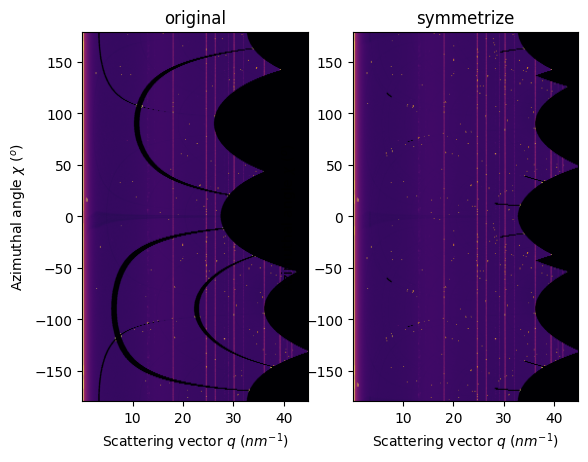

In [5]:
fig, ax = subplots(1,2)
jupyter.plot2d(res, ax=ax[0], label="original")
jupyter.plot2d(sym, ax=ax[1], label="symmetrize");

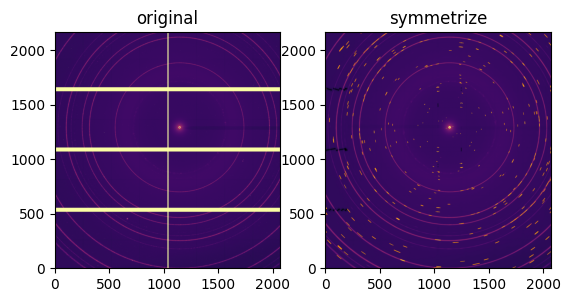

In [6]:
fake = ai.calcfrom2d(*sym, dim1_unit=sym.radial_unit, dim2_unit=sym.azimuthal_unit)
fig,ax = subplots(1,2)
jupyter.display(img, ax=ax[0], label="original")
jupyter.display(fake, ax=ax[1], label="symmetrize");

In [7]:
print(f"Run time: {time.perf_counter()-t0:.3f}s")

Run time: 5.391s


Conclusion: This method can be used to fill-up (partially) the gaps arraising from modular detectors.